In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()      #There are total 13 columns in this data & we can see that there is no null values present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.shape

(545, 13)

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
Categorical_Col = []
Numerical_Col = []

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical_Col.append(col)
        
    else:
        Numerical_Col.append(col)

In [9]:
Categorical_Col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [10]:
Numerical_Col

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [11]:
for col in Categorical_Col:
    print('Column Name: ',col, 'Unique Values: ',df[col].unique())

Column Name:  mainroad Unique Values:  ['yes' 'no']
Column Name:  guestroom Unique Values:  ['no' 'yes']
Column Name:  basement Unique Values:  ['no' 'yes']
Column Name:  hotwaterheating Unique Values:  ['no' 'yes']
Column Name:  airconditioning Unique Values:  ['yes' 'no']
Column Name:  prefarea Unique Values:  ['yes' 'no']
Column Name:  furnishingstatus Unique Values:  ['furnished' 'semi-furnished' 'unfurnished']


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LE1=LabelEncoder()
LE2=LabelEncoder()

In [14]:
for col in Categorical_Col:
    if col !='furnishingstatus':
        df[col]=LE1.fit_transform(df[col])

In [15]:
df['furnishingstatus']=LE2.fit_transform(df['furnishingstatus'])

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


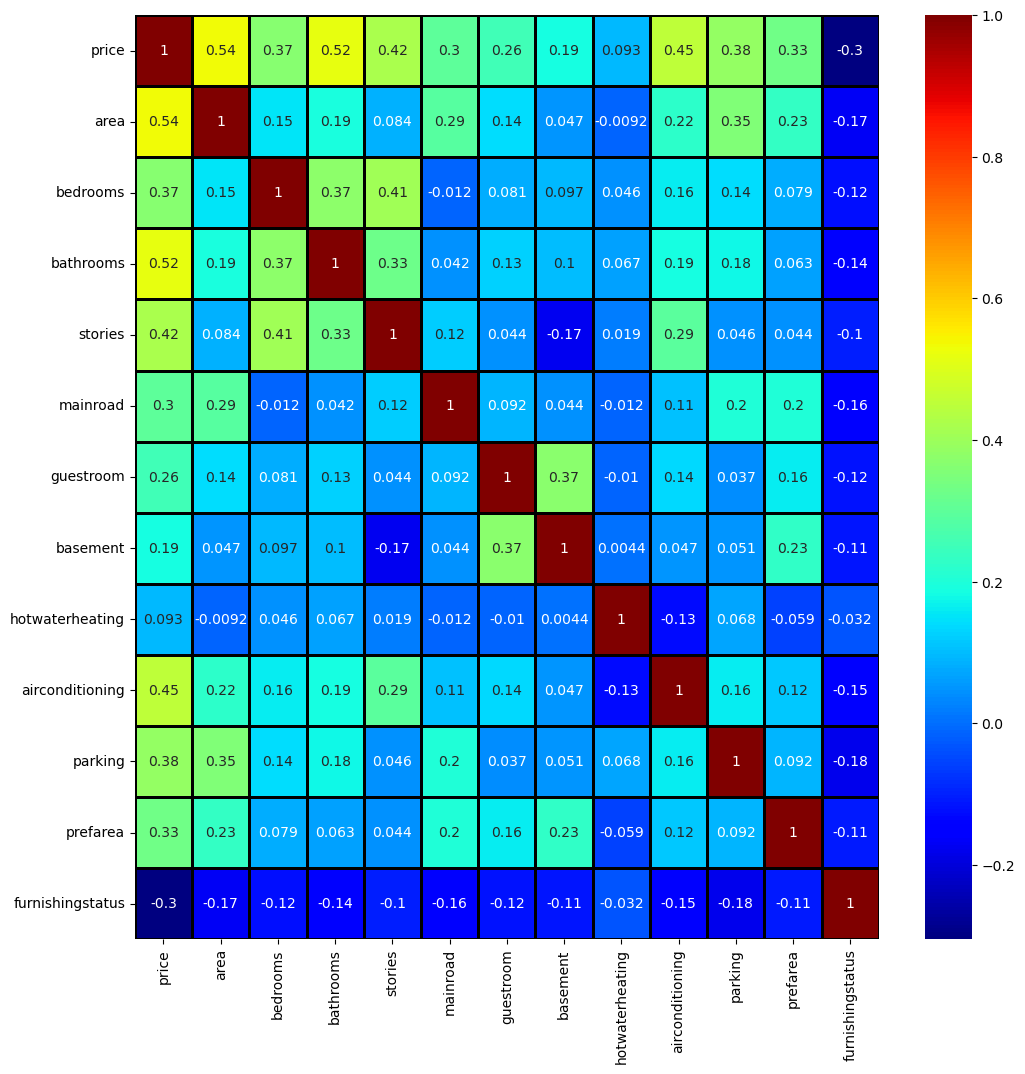

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linecolor='black',linewidths=1, cmap='jet')
plt.show()

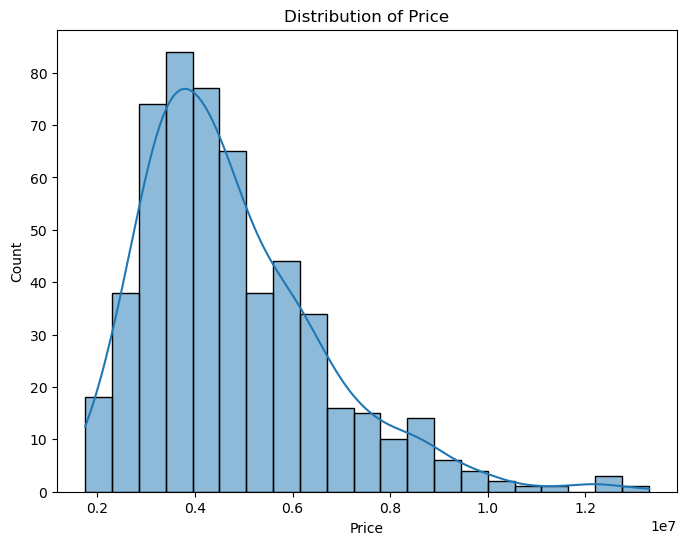

In [18]:
plt.figure(figsize = (8,6))
sns.histplot(df['price'], kde =True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

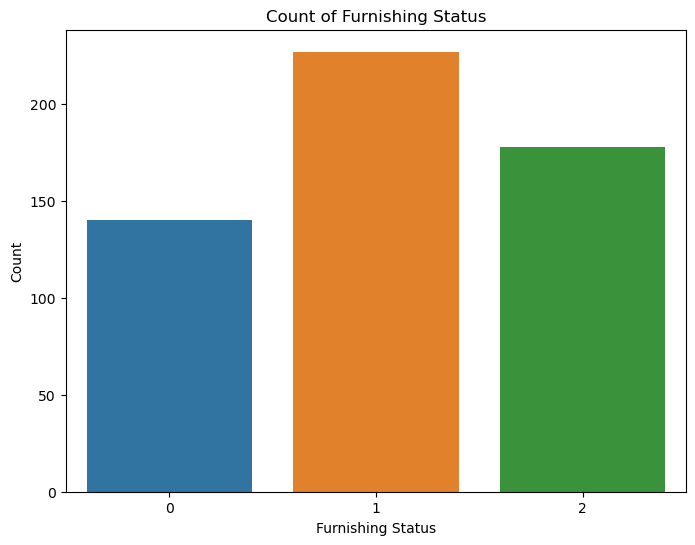

In [19]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'furnishingstatus', data = df)
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.title('Count of Furnishing Status')
plt.show()

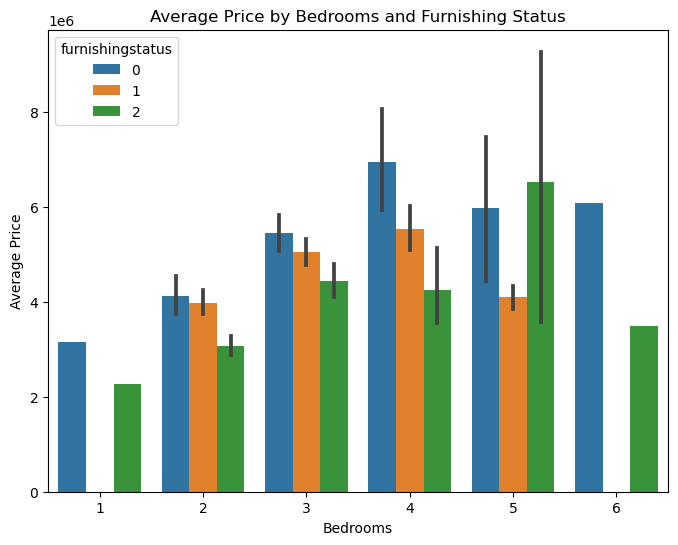

In [20]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'bedrooms', y = 'price', hue = 'furnishingstatus', data = df)
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Bedrooms and Furnishing Status')
plt.show()

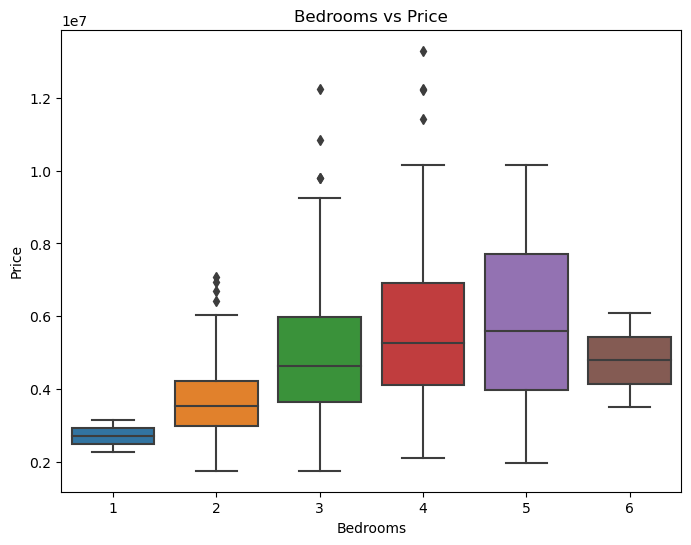

In [21]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()

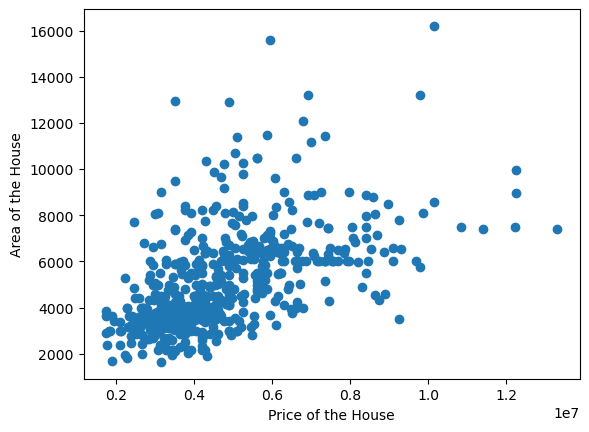

In [22]:
plt.scatter(df.price, df.area)
plt.xlabel('Price of the House')
plt.ylabel('Area of the House')
plt.show()

<Axes: xlabel='price', ylabel='area'>

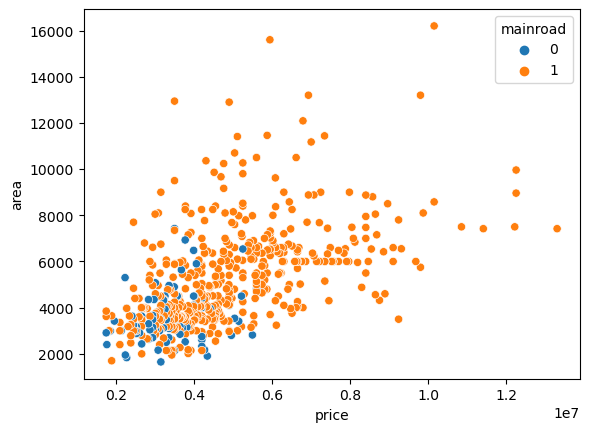

In [23]:
sns.scatterplot(x='price',y='area',hue = 'mainroad',data=df)

<Axes: xlabel='price', ylabel='area'>

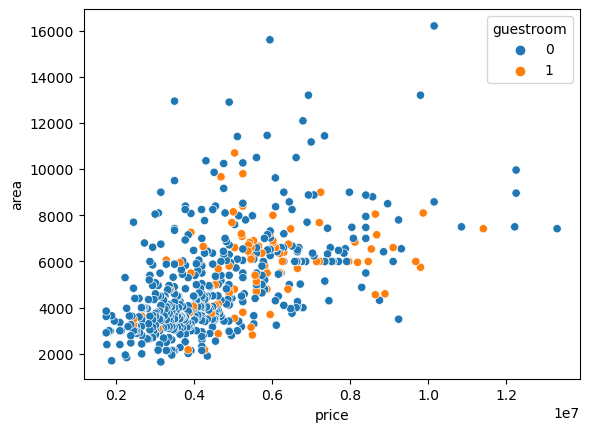

In [24]:
sns.scatterplot(x = 'price', y = 'area', hue = 'guestroom', data = df)

In [25]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,1:]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [27]:
y=df.iloc[:,:1]
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)

In [34]:
LR.coef_

array([[ 2.35848772e+02,  7.85744924e+04,  1.09711727e+06,
         4.06223164e+05,  3.66824192e+05,  2.33146766e+05,
         3.93159779e+05,  6.87881311e+05,  7.85550579e+05,
         2.25756514e+05,  6.29901661e+05, -2.10397118e+05]])

In [35]:
LR.intercept_

array([293083.06915067])

In [36]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"\nCM :\n {cm}\nCR : {cr}")


CM :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CR :               precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         2
     2100000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         1
     2275000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         2
     2520000       0.00      0.00      0.00         1
     2660000       0.00      0.00      0.00         4
     2800000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         2
     3003000       0.00      0.00      0.00         1
     3010000       0.00      0.00      0.00         1
   

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1820000       0.00      0.00      0.00         1
     1855000       0.00      0.00      0.00         0
     1890000       0.00      0.00      0.00         2
     2100000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         1
     2275000       0.00      0.00      0.00         1
     2345000       0.00      0.00      0.00         0
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         2
     2485000       0.00      0.00      0.00         0
     2520000       0.00      0.00      0.00         1
     2653000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         4
     2695000       0.00      0.00      0.00         0
     2730000       0.00      0.00      0.00         0
     2800000       0.00      0.00      0.00         1
     2870000       0.00    

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(f"MSE : {mse}\nMAE : {mae}\nRMSE : {rmse}\nR2_SCORE : {r2}")

MSE : 3809951169724.7705
MAE : 1367055.0458715595
RMSE : 1951909.621300323
R2_SCORE : 0.24623637935021847
